# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [64]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Importing data

In [65]:

# Load the dataset
df = sns.load_dataset('iris')


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [66]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


2. Drop rows with any missing values


In [67]:
df = df.dropna()

3. Encoding the class label categorical column: from string to num


In [68]:
# Encoding the categorical column
df['species_numeric'], species_unique = pd.factorize(df['species'])
df.drop(["species"],axis='columns',inplace=True)
# Display the first few rows of the updated dataframe
df.head()
#Visualize the dataset


,sepal_length,sepal_width,petal_length,petal_width,species_numeric
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now the label/category is numeric


4. Discard columns that won't be used


In [69]:
# # Drop out non necesary columns
# dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# #Visualize the dataset
# dataset


5. Scatter plot of the data

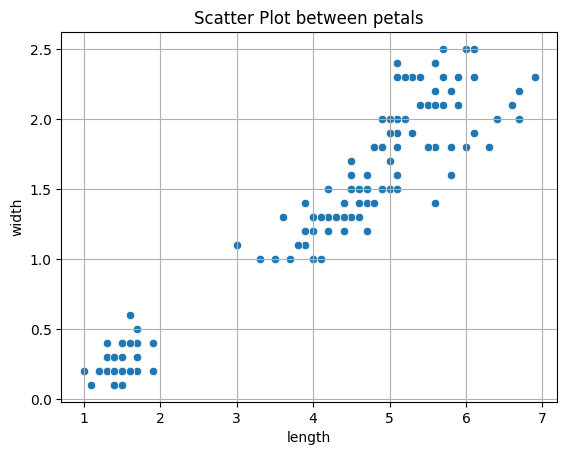

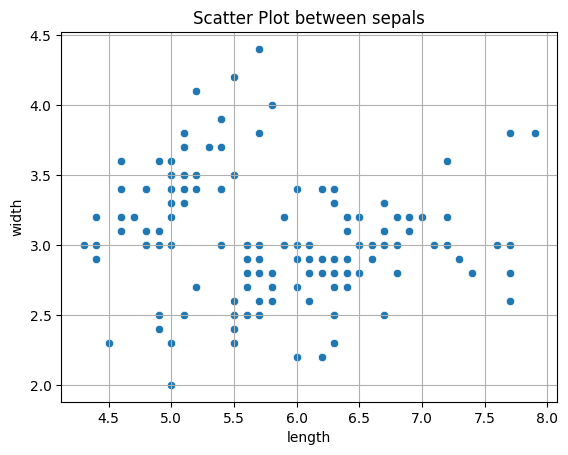

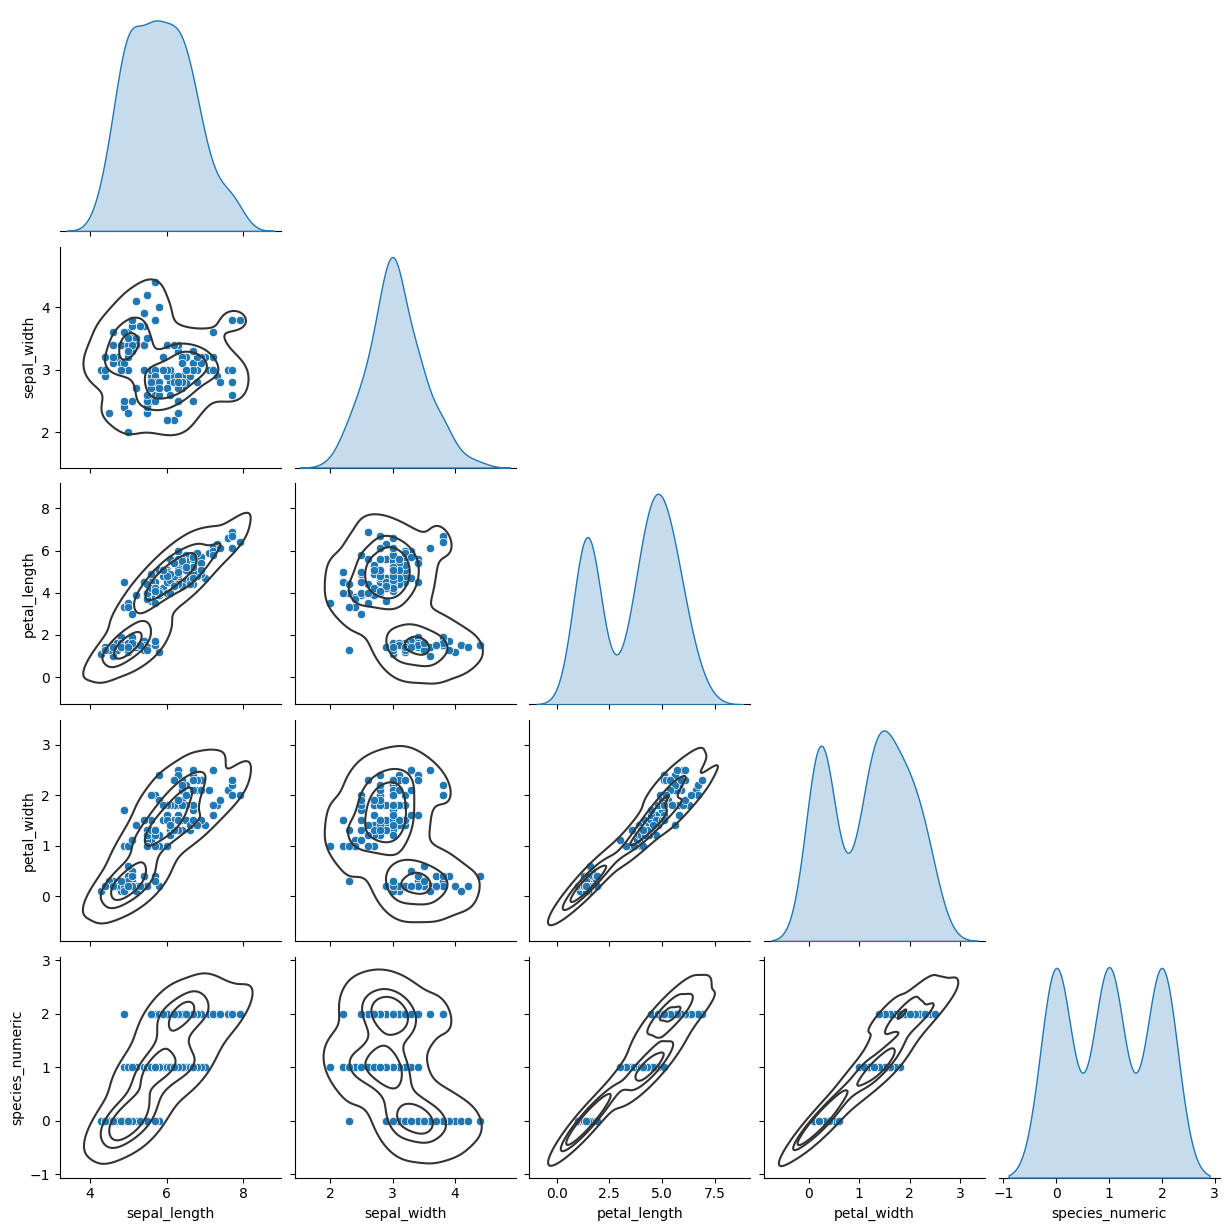

In [70]:
# petalos
sns.scatterplot(data=df, x='petal_length', y='petal_width')
plt.title('Scatter Plot between petals')
plt.xlabel('length')
plt.ylabel('width')
plt.grid(True)
plt.show()
# sepalos
sns.scatterplot(data=df, x='sepal_length', y='sepal_width')
plt.title('Scatter Plot between sepals')
plt.xlabel('length')
plt.ylabel('width')
plt.grid(True)
plt.show()
#
g = sns.pairplot(df, corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

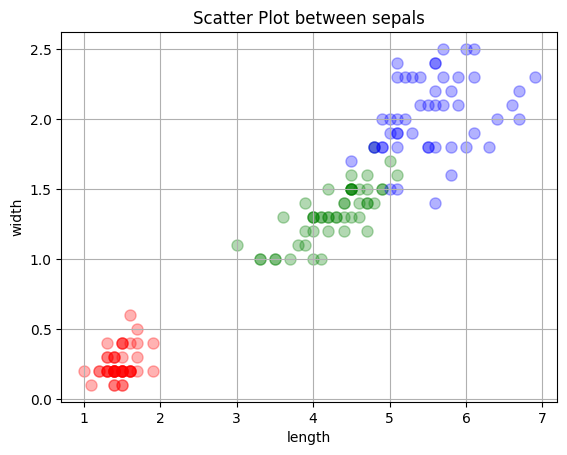

In [71]:
# Get dataframes for each real cluster
df1 = df[df.species_numeric==0]
df2 = df[df.species_numeric==1]
df3 = df[df.species_numeric==2]

plt.scatter(df1.petal_length,df1.petal_width,label='Flower 0', c="r",marker='o',s = 64, alpha=0.3)
plt.scatter(df2.petal_length,df2.petal_width,label='Flower 1', c="g",marker='o',s = 64, alpha=0.3)
plt.scatter(df3.petal_length,df3.petal_width,label='Flower 2', c="b",marker='o',s = 64, alpha=0.3)

plt.title('Scatter Plot between sepals')
plt.xlabel('length')
plt.ylabel('width')
plt.grid(True)
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [72]:
# Import sklearn KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Define number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Fit the KMeans model and assign each point in the dataset to a cluster
df['cluster'] = kmeans.fit_predict(X)

# Print the estimated cluster for each point in the dataset
print(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cluster']])

     sepal_length  sepal_width  petal_length  petal_width  cluster
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        0
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        0

[150 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


No se que decia aca, lo borre sin querer

In [73]:
# Manual pairing the labels of the real and estimated clusters
conf_matrix = confusion_matrix(df['species_numeric'], df['cluster'])

# Display the confusion matrix
print(conf_matrix)

[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


In [74]:
# Add a new column to the dataset with the cluster information
df

,sepal_length,sepal_width,petal_length,petal_width,species_numeric,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [75]:
# Laber of the estimated clusters
# 0 = setosa
# 1 = versicolor
# 2 = virginica

In [76]:
# Cluster centroides
kmeans.fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [77]:
# Sum of squared error (sse) of the final model
print(kmeans.inertia_)

78.851441426146


In [78]:
# The number of iterations required to converge
print(kmeans.n_iter_)

4


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

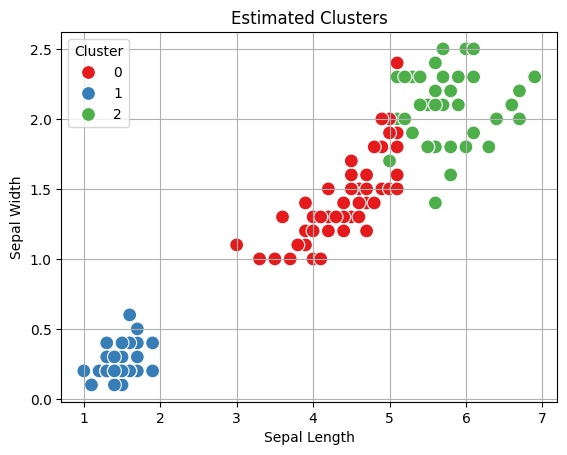

In [79]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='cluster', palette='Set1', s=100)
plt.title('Estimated Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Plot both real and estimated clusters to check for errors

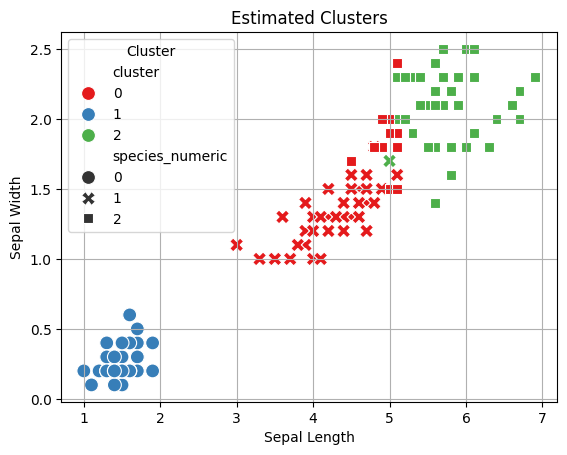

In [80]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='cluster', style='species_numeric',palette='Set1', s=100)
plt.title('Estimated Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...



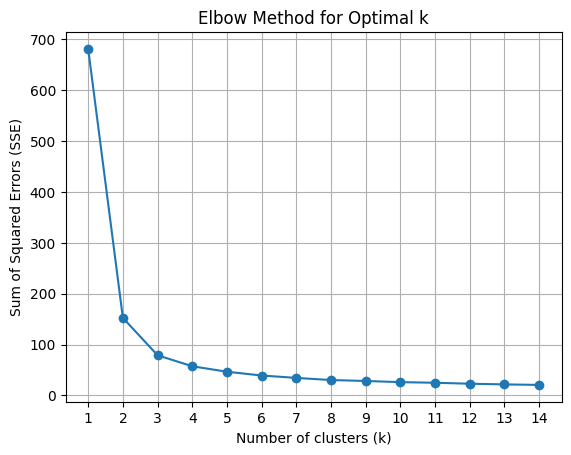

In [81]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define range of k values
k_values = range(1, 15)

# For each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the SSE values for different k
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Choose the k after which the sse is minimally reduced


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

Conclusion
Los clusters tienen una buena probabilidad de encapsular de buena manera a los petalos aunque debido a cierta cercania entre los petalos de 2 especies se pierde un poco la linea entre las dos especies.